In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange

# Uniform Resetting

In [2]:
@njit
def voter_model_uniform(N, t, r, m0):
    '''Takes:
    N: number of agents
    t: time in MC steps
    r: resetting rate per MC step
    m0: starting magnetisation
    
        Returns:
    config: The config at time t
    res: number of resets'''
    
    # Initialize
    n = int(N*(m0+1)/2)  
    n_ini = n
    time = 0.0

    while time < t:
        la = r + 2* ( n*(N-n)/(N-1) )
        dt = -np.log(np.random.random()) / la
        
        # Check if this step exceeds our simulation duration
        if time + dt > t:
            # We spend the remainder of the time in the current state 'n'
            break
            
        time += dt

        if np.random.random() < r/la:
            n = np.random.randint(0,N+1)
        else:
            if np.random.random() < 0.5:
                n += 1
            else:
                n += -1
    
    return(2*n/N-1)

In [3]:
@njit(parallel=True)
def dist_uniform(N, t, r, m0, samples):
    '''Returns the magnetisation at time t for some samples'''
    res = np.zeros(samples)

    for i in prange(samples):
        res[i] = voter_model_uniform(N, t, r, m0)
    
    return res

### Compare

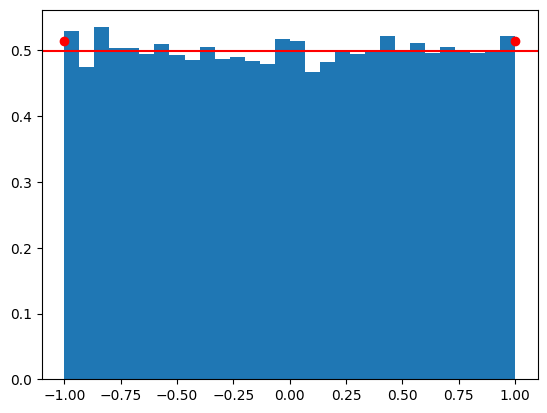

In [12]:
r = 1
N = 1000
bins = 30

plt.hist(dist_uniform(N, 1000, r, 0.66, 50000), bins = bins, density = True)
plt.axhline(y = 0.5*r/(2/N+r), color = "r")
plt.scatter([-1,1], [0.5*r/(2/N+r)+0.5*(1-r/(2/N+r))/(2/bins), 0.5*r/(2/N+r)+0.5*(1-r/(2/N+r))/(2/bins)], color = "r")